In [1]:
# Standard libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Preview the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Descriptive statistics for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling missing values

In [4]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# The 'Cabin' column has a very high percentage of missing values (over 75%), 
# which makes it unreliable for analysis. Therefore, we drop this column 
# to avoid introducing noise or bias into the model.
df.drop('Cabin', axis=1, inplace=True)

In [7]:
# Handle missing values for numerical features using median imputation ('Age')
df['Age'] = df['Age'].fillna(df['Age'].median())

# Handle missing values for categorical features using the most frequent value (mode) ('Embarked')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Checking again to verify no missing values remain
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Encoding Categorical Features

In [8]:
# One-hot encoding for 'Sex' and 'Embarked' categorical columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

# Normalization of Numerical Features

In [10]:
# Apply Min-Max normalization to selected numerical columns ('Age' and 'Fare')
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Double-check scaling
df[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,0.363679,0.062858
std,0.163605,0.096995
min,0.000000,0.000000
25%,0.271174,0.015440
50%,0.346569,0.028213
75%,0.434531,0.060508
max,1.000000,1.000000


# Visualizing and Removing Outliers

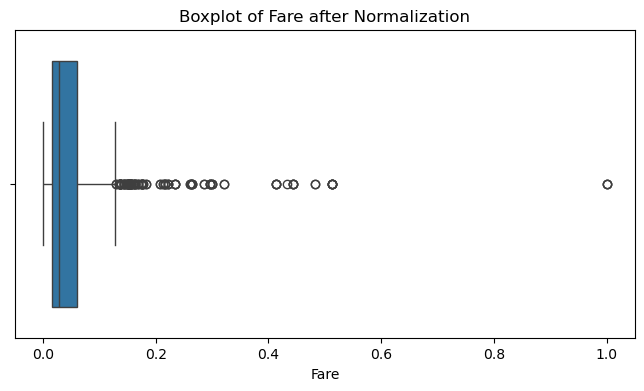

In [11]:
# Boxplot to visualize potential outliers in 'Fare'
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare after Normalization')
plt.show()

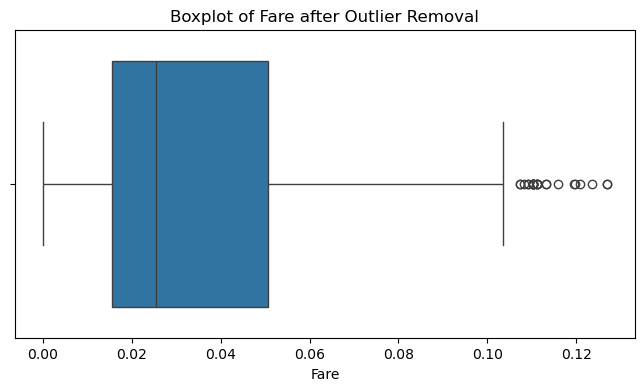

In [12]:
# Remove outliers in 'Fare' using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower) & (df['Fare'] <= upper)]

# Boxplot after removing outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare after Outlier Removal')
plt.show()

In [14]:
df.to_csv('data/cleaned_titanic.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data'